<a href="https://www.kaggle.com/code/edwinmurianyi/explanatory-data-analysis-for-quality-of-wine?scriptVersionId=199346022" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# loading required packages
import numpy as np 
import pandas as pd # data processing
import matplotlib.pyplot as plt # for data visualisations
import seaborn as sns # for data visualisations
import scipy.stats as stats
import statsmodels.api as sm

#  LOADING DATA

In [2]:
df = pd.read_csv('/kaggle/input/wine-quality-dataset/winequality-dataset_updated.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.3,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.2,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

The data is in continious form. Let us find the descriptive statistics. Specifically quality is in int64 formart.

# DESCRIPTIVE STATISTICS

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1999.0,8.670335,2.240023,4.60000,7.100000,8.0000,9.9000,15.90000
volatile acidity,1999.0,0.541773,0.180381,0.12000,0.400000,0.5300,0.6600,1.58000
citric acid,1999.0,0.246668,0.181348,0.00000,0.110000,0.2000,0.3850,1.00000
residual sugar,1999.0,3.699090,3.290201,0.90000,2.000000,2.3000,3.4600,15.99000
chlorides,1999.0,0.075858,0.048373,0.01000,0.056000,0.0750,0.0860,0.61100
free sulfur dioxide,1999.0,20.191096,15.642224,1.00000,9.000000,16.0000,27.0000,72.00000
total sulfur dioxide,1999.0,52.617809,37.051121,6.00000,24.000000,42.0000,73.0000,289.00000
density,1999.0,0.996477,0.002110,0.99007,0.995265,0.9966,0.9978,1.00369
pH,1999.0,3.290140,0.274297,2.34000,3.180000,3.3000,3.4200,4.16000
sulphates,1999.0,0.949465,0.780523,0.33000,0.560000,0.6500,0.8400,3.99000


In [5]:
df = df.drop_duplicates()

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1760.0,8.710455,2.293976,4.60000,7.1000,8.00000,10.0000,15.90000
volatile acidity,1760.0,0.545045,0.183404,0.12000,0.4000,0.54000,0.6600,1.58000
citric acid,1760.0,0.244261,0.180000,0.00000,0.1100,0.19000,0.3800,1.00000
residual sugar,1760.0,3.844392,3.424476,0.90000,2.0000,2.40000,3.8000,15.99000
chlorides,1760.0,0.074782,0.050203,0.01000,0.0500,0.07400,0.0860,0.61100
free sulfur dioxide,1760.0,20.788636,16.118756,1.00000,9.0000,16.00000,28.0000,72.00000
total sulfur dioxide,1760.0,53.722443,37.795090,6.00000,24.0000,44.00000,75.0000,289.00000
density,1760.0,0.996411,0.002118,0.99007,0.9952,0.99655,0.9978,1.00369
pH,1760.0,3.286381,0.286839,2.34000,3.1700,3.30000,3.4200,4.16000
sulphates,1760.0,0.989398,0.821606,0.33000,0.5600,0.66000,0.8700,3.99000


**Statistical Summary:**

1. Count: The total number of data points for each feature. Here, each feature has 1,760 entries, so the dataset is complete without missing values.

2. Mean: This represents the average value of each feature. For example, the mean for fixed acidity is 8.71, meaning that on average, the acidity level in the dataset is around 8.71 units.

3. Standard Deviation (std): This tells you how spread out the values are around the mean. A larger standard deviation means greater variability. Fixed acidity has an SD of 2.29, which suggests moderate variability around the mean. Total sulfur dioxide has an SD of 37.8, indicating a large spread in sulfur dioxide levels compared to others.

4. Min, 25%, 50%, 75%, Max:Min: The minimum value in the dataset for each feature.25%, 50% (median), 75%: These represent the quartiles, which show how the data is distributed.For example, 25% of the pH values are below 3.17, 50% are below 3.30, and 75% are below 3.42.Max: The maximum value for each feature.Residual sugar has a large range from 0.9 to 15.99, showing significant variation.


In [7]:
# Create an empty dictionary to store the CV for each column
cv_dict = {}

# Loop through each column in the DataFrame
for i in df.columns:
    cv = df[i].mean() / df[i].std()
    cv_dict[i] = cv
    
cv_df = pd.DataFrame(cv_dict.items(), columns=['Column', 'Coefficient of Variation'])
print(cv_df)

                  Column  Coefficient of Variation
0          fixed acidity                  3.797100
1       volatile acidity                  2.971831
2            citric acid                  1.357007
3         residual sugar                  1.122622
4              chlorides                  1.489590
5    free sulfur dioxide                  1.289717
6   total sulfur dioxide                  1.421413
7                density                470.346796
8                     pH                 11.457243
9              sulphates                  1.204224
10               alcohol                  7.590643
11               quality                  4.288527


Coefficient of Variation (CV):

The CV helps you compare the relative variability between the features, which is useful when the units or scales of the data differ.

Interpretation of CV Values:

Low CV (< 1): Less variation relative to the mean.
Residual sugar (1.12) and chlorides (1.49): These values suggest moderate variability in these features relative to their means.


Moderate CV (1–3): Moderate variability relative to the mean.
Citric acid (1.36), free sulfur dioxide (1.29), and total sulfur dioxide (1.42) have moderate variation around their means.
Fixed acidity (3.79) and volatile acidity (2.97) have more variability compared to some of the other features.


High CV (> 3): Large variation relative to the mean.
Alcohol (7.59) and quality (4.29) have relatively high variability, suggesting these features fluctuate widely compared to their means.
Density (470.35) and pH (11.46) have very high CVs, meaning they are highly variable compared to their means, but this might be due to very small values of the mean for density and pH.

Density and pH have unusually high CVs, likely because their means are very close to zero, causing the ratio (mean/sd) to be large. This might not indicate actual large variability but a characteristic of the data's scale.

Fixed acidity and volatile acidity have high relative variability, suggesting that these features might be more inconsistent across the dataset.

Features like residual sugar, citric acid, and sulphates have moderate variability, which could indicate more consistent values across different data points.

# UNIVARIATE ANALYSIS

## HISTOGRAMS

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


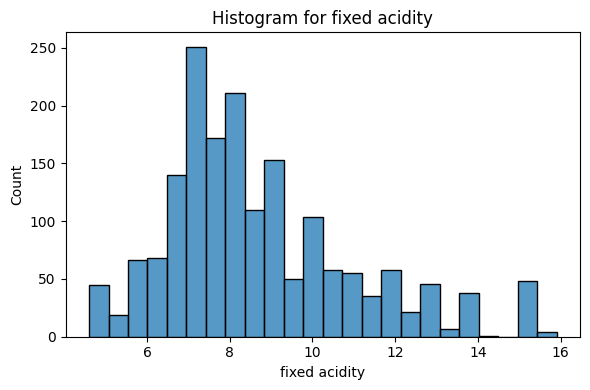

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


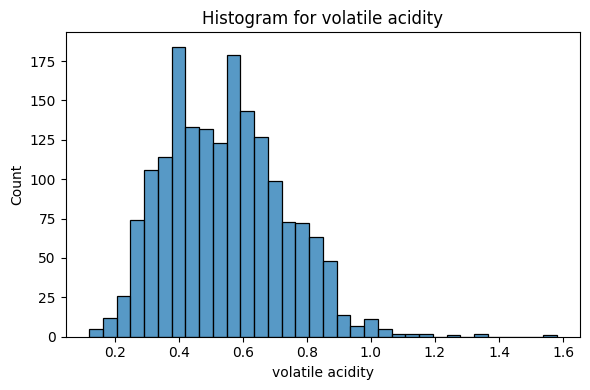

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


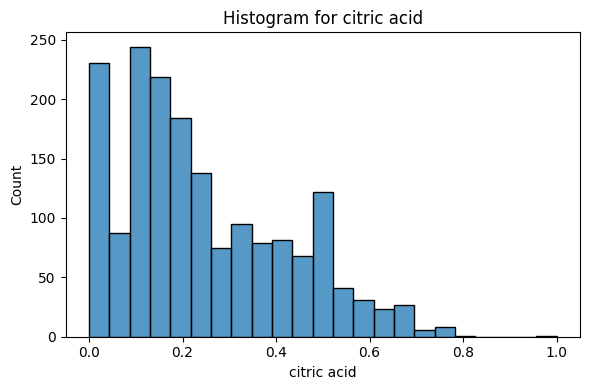

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


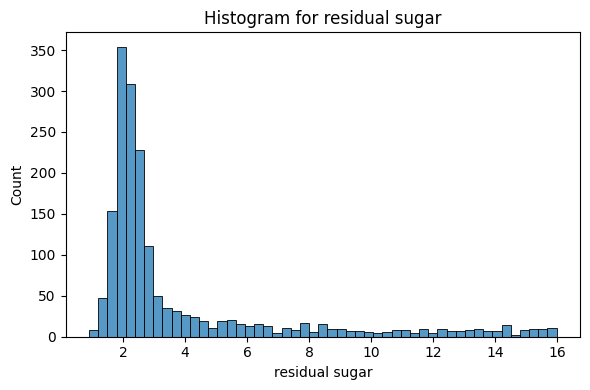

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


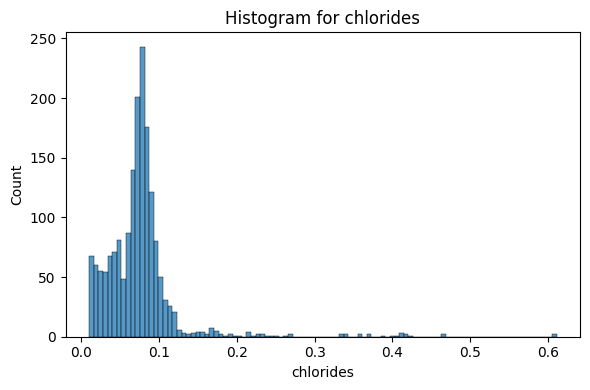

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


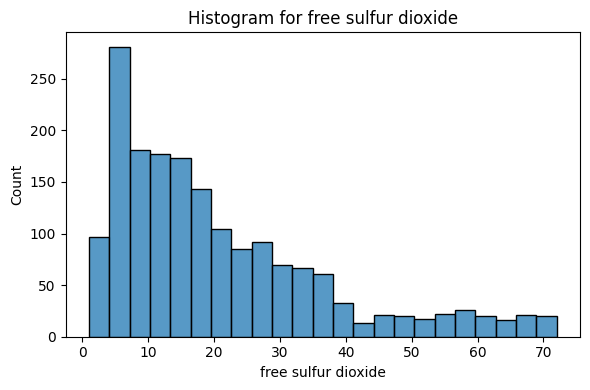

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


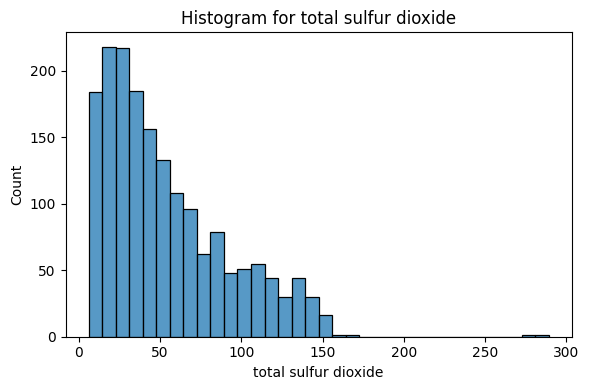

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


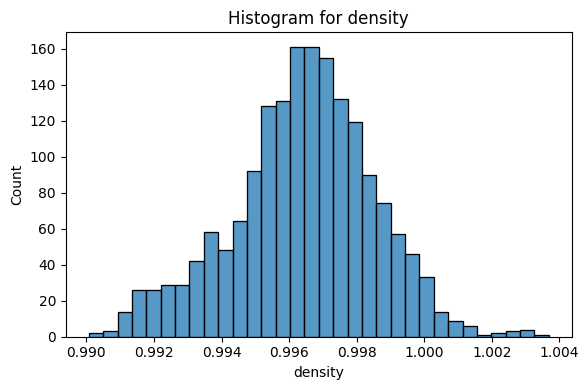

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


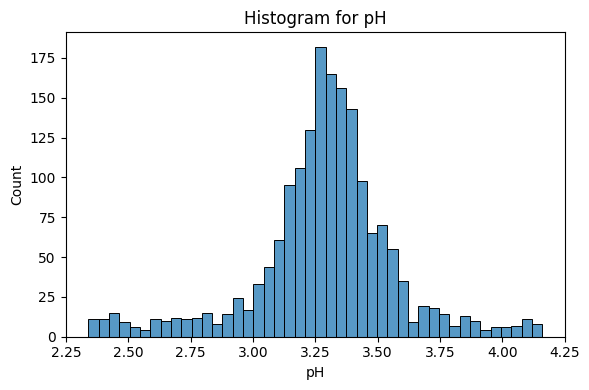

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


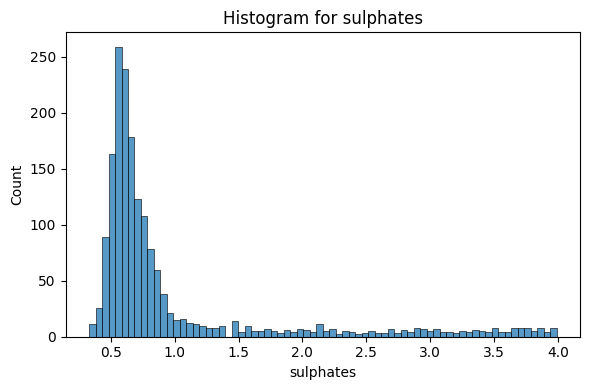

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


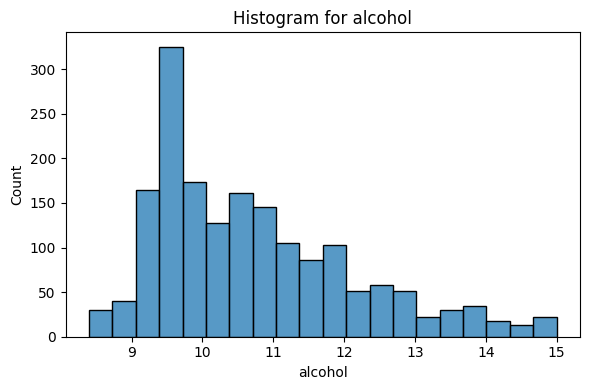

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


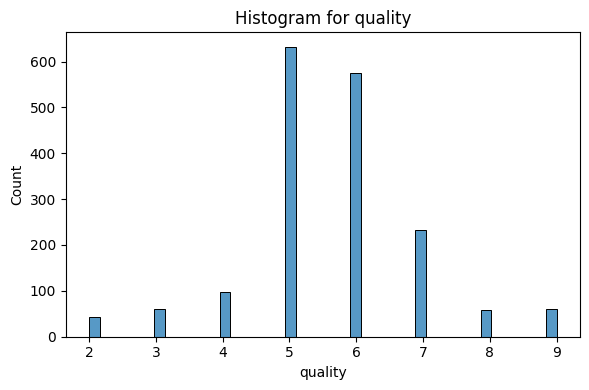

In [8]:
for i in df.columns:
    plt.figure(figsize=(6, 4)) 
    sns.histplot(data=df[i])
    plt.title(f'Histogram for {i}')
    plt.tight_layout()
    plt.show()

Most of the data is skewed.

## BOX PLOTS

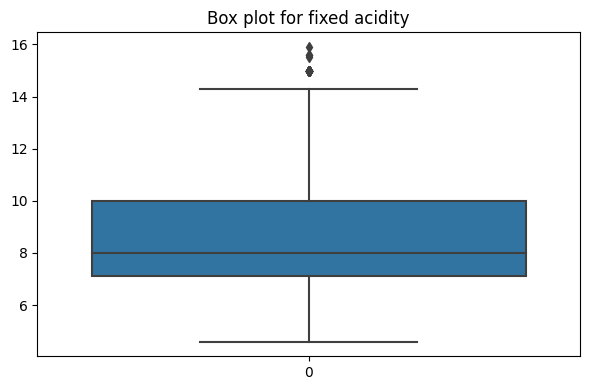

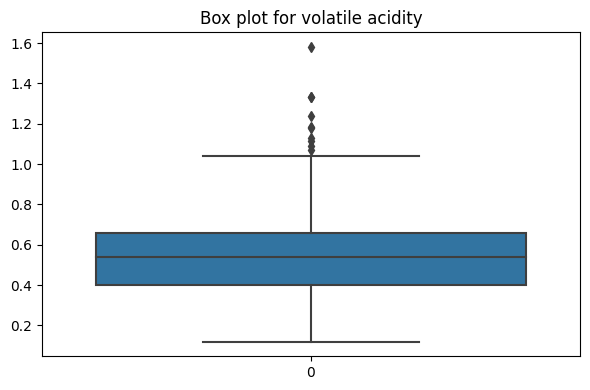

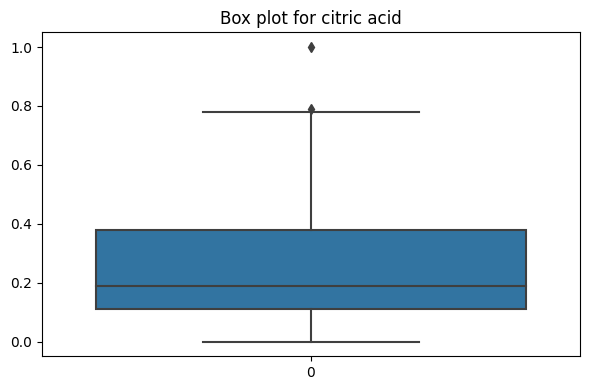

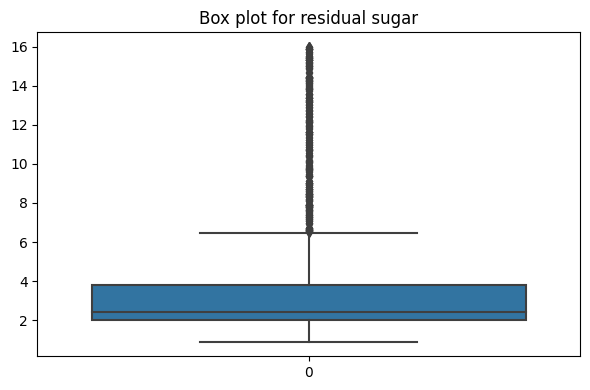

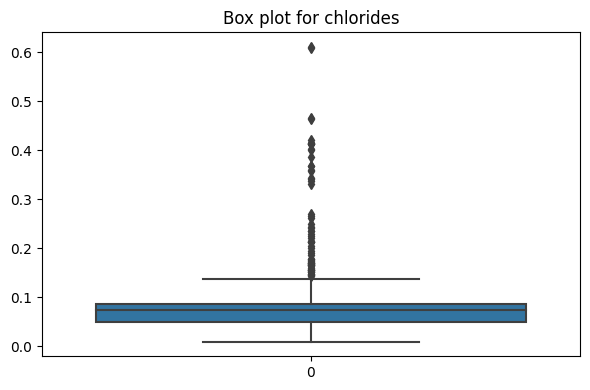

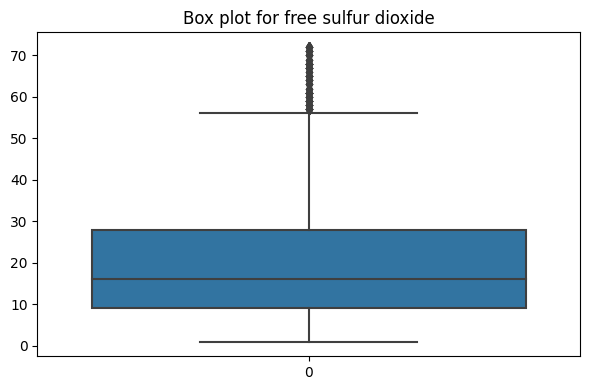

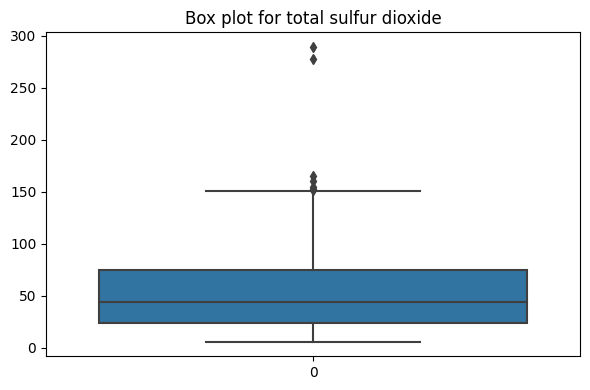

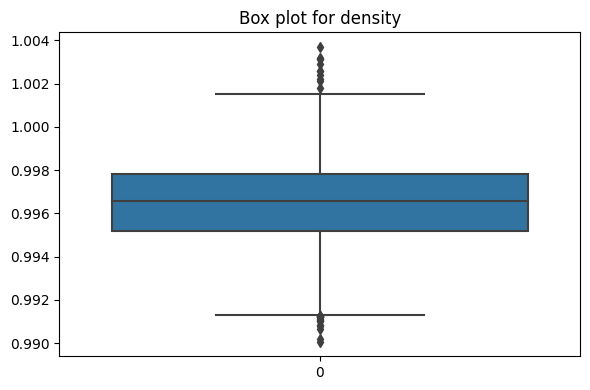

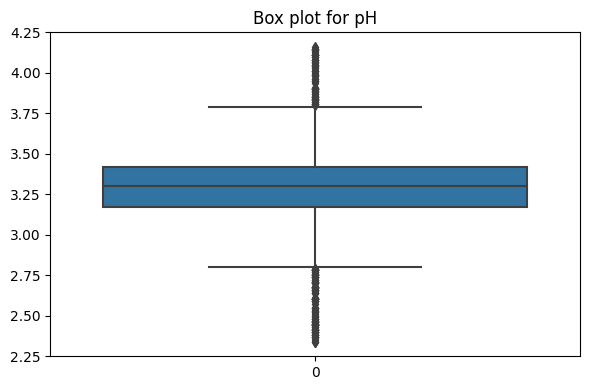

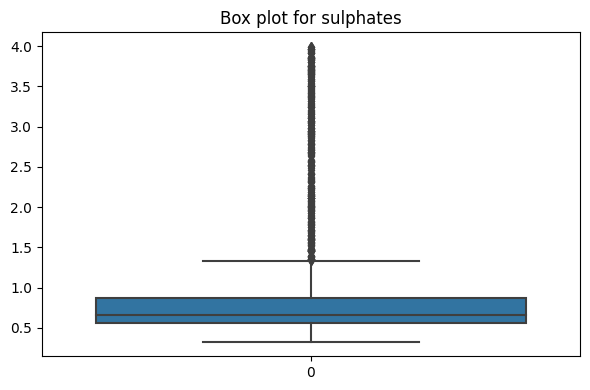

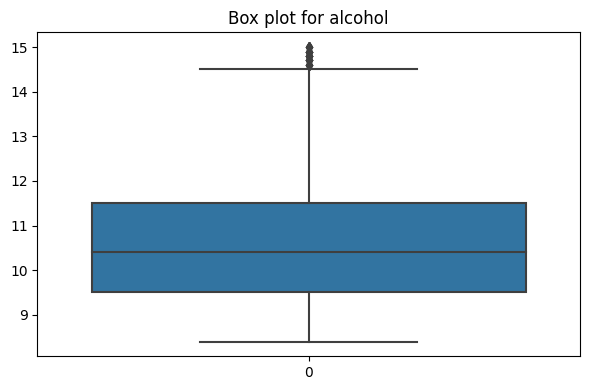

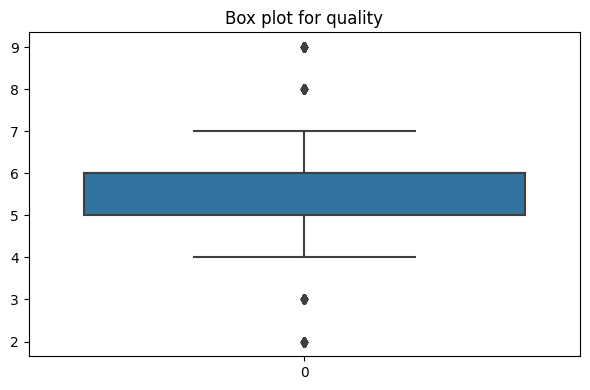

In [9]:
# Create separate box plots for each numerical column
for column in df.columns:
    plt.figure(figsize=(6, 4))  # Set figure size for each plot
    sns.boxplot(data=df[column])
    plt.title(f'Box plot for {column}')
    plt.tight_layout()
    plt.show()

## DENSITY PLOTS

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


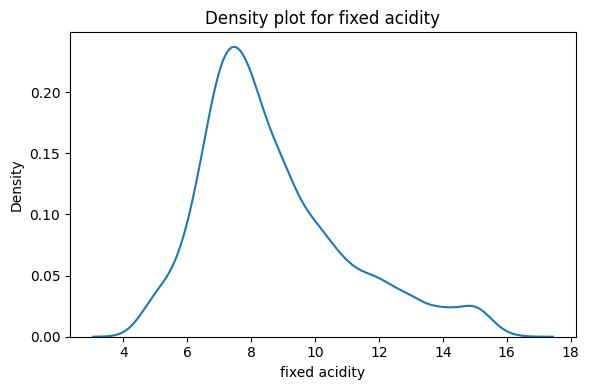

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


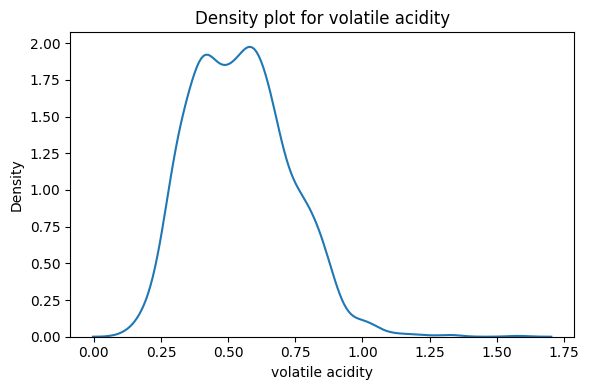

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


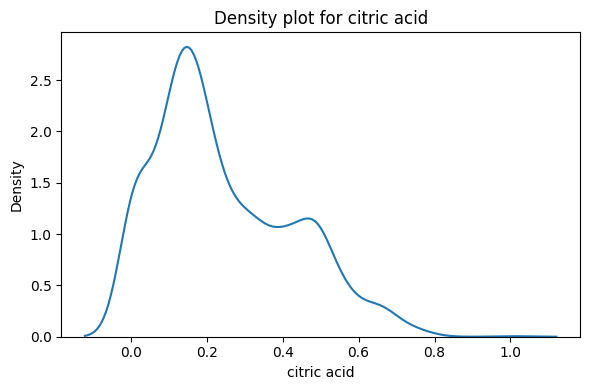

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


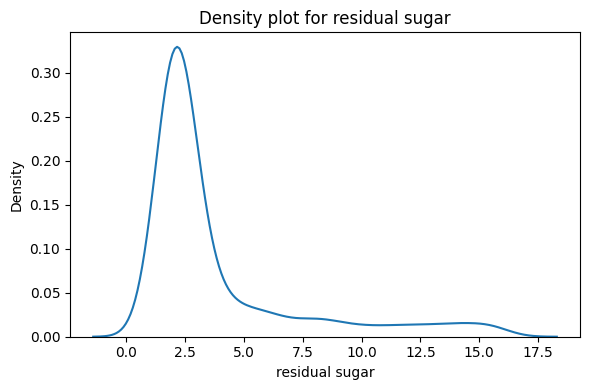

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


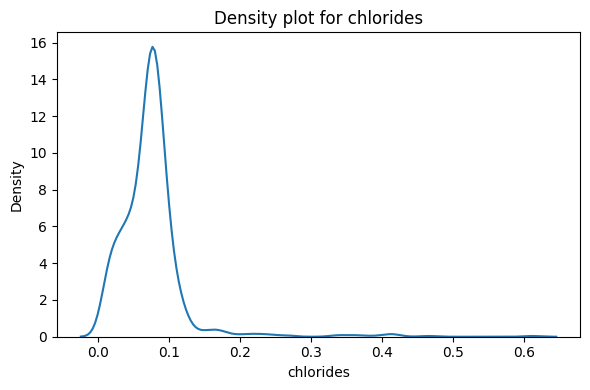

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


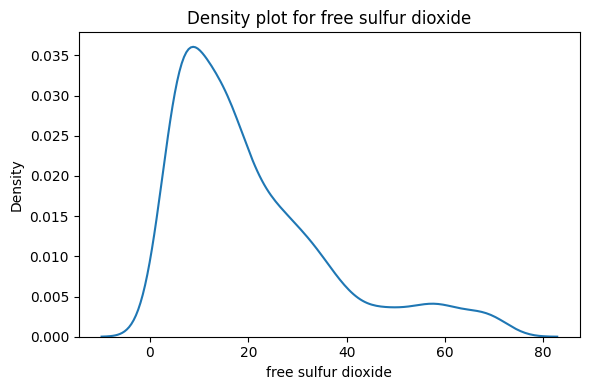

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


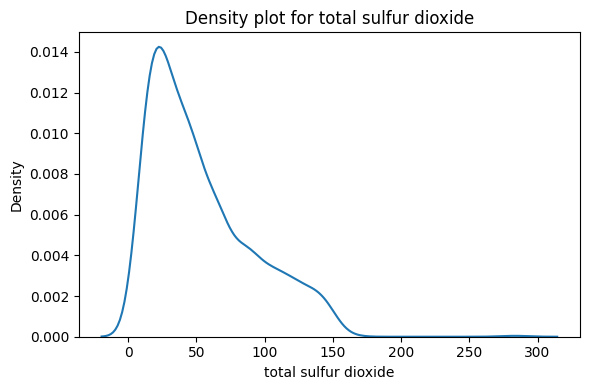

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


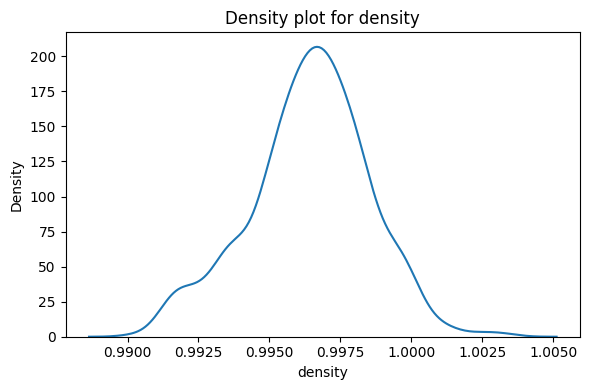

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


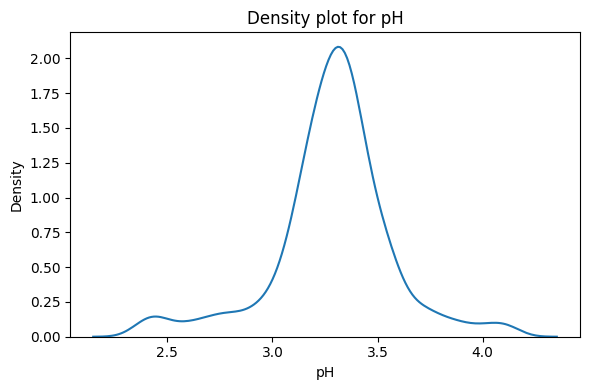

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


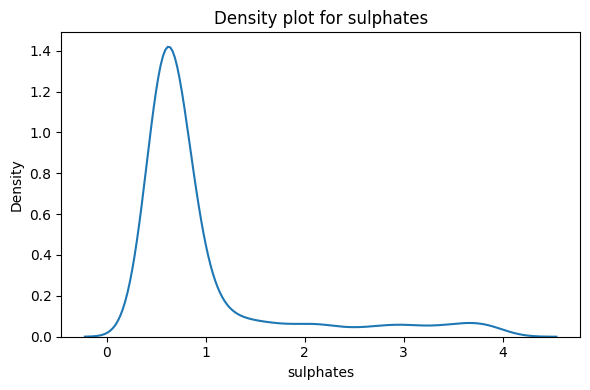

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


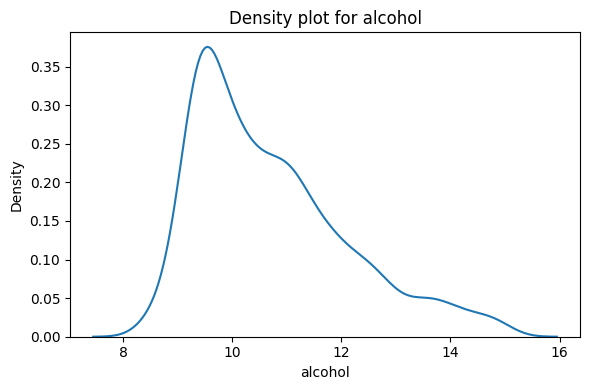

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


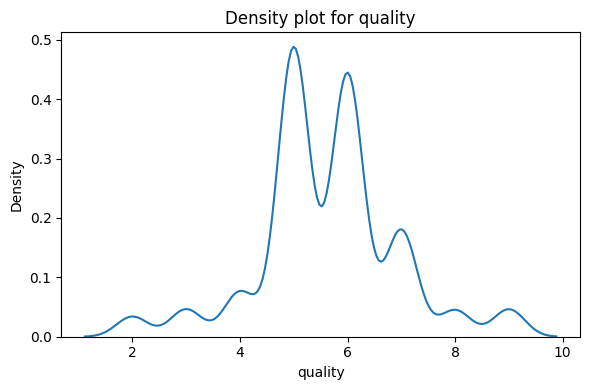

In [10]:
for column in df.columns:
    plt.figure(figsize=(6, 4))  # Set figure size for each plot
    sns.kdeplot(data=df[column])
    plt.title(f'Density plot for {column}')
    plt.tight_layout()
    plt.show()

## QQ PLOTS: TEST FOR NORMALITY

<Figure size 600x400 with 0 Axes>

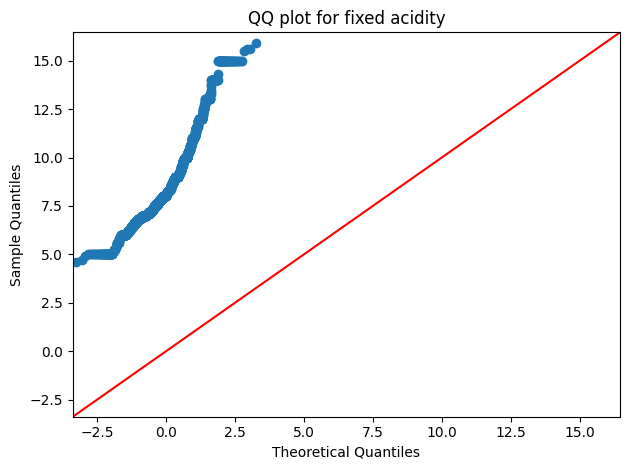

<Figure size 600x400 with 0 Axes>

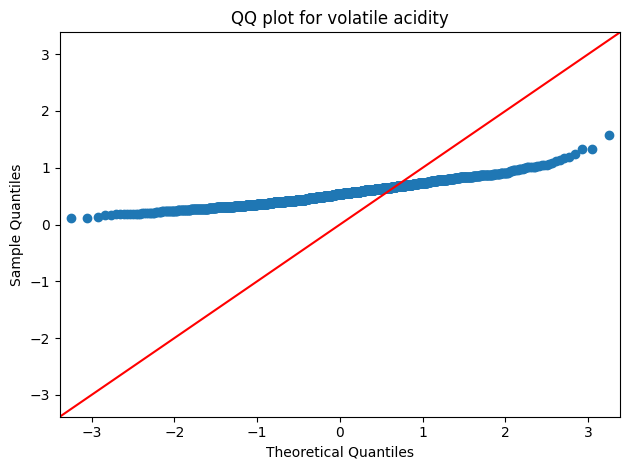

<Figure size 600x400 with 0 Axes>

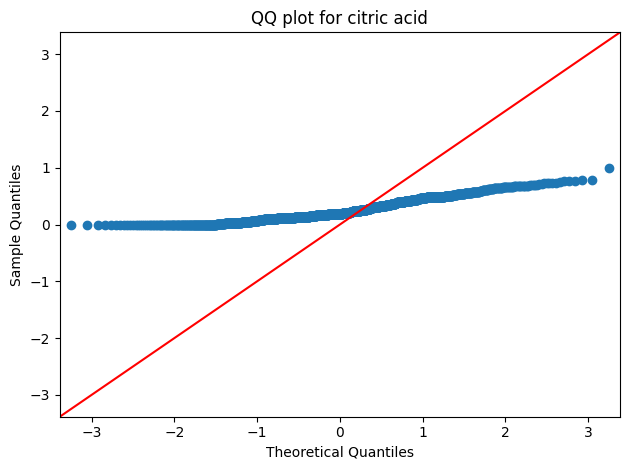

<Figure size 600x400 with 0 Axes>

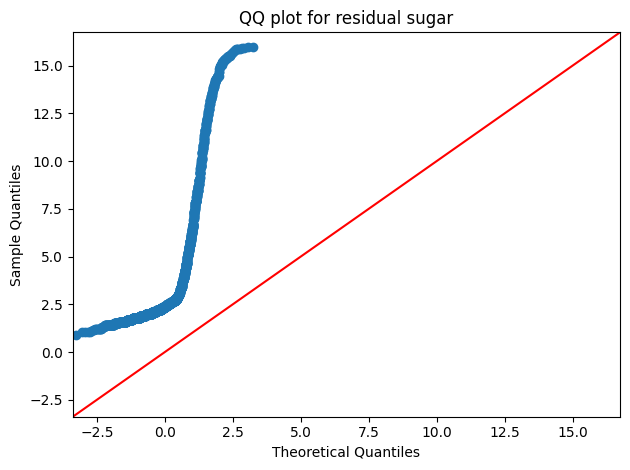

<Figure size 600x400 with 0 Axes>

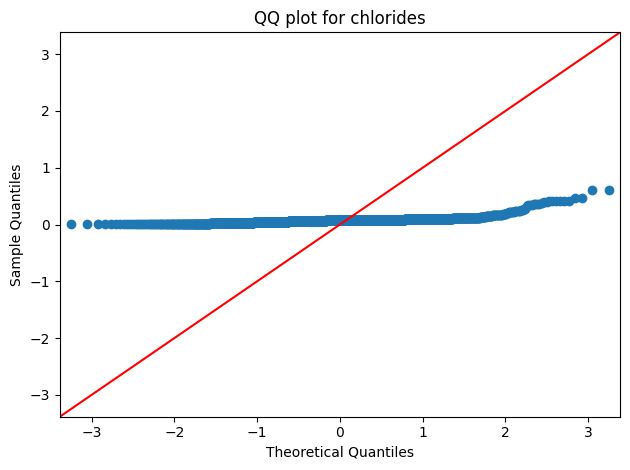

<Figure size 600x400 with 0 Axes>

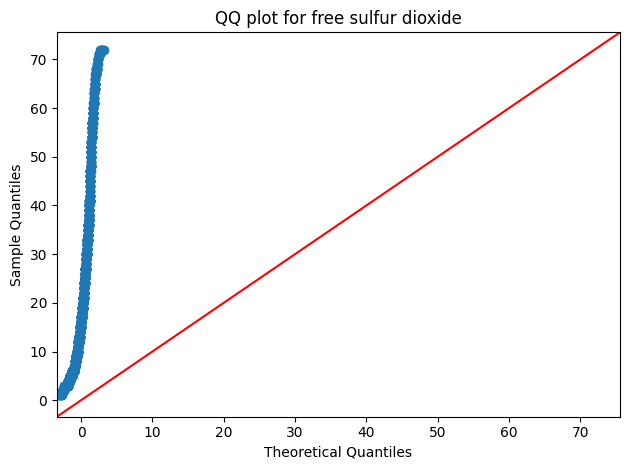

<Figure size 600x400 with 0 Axes>

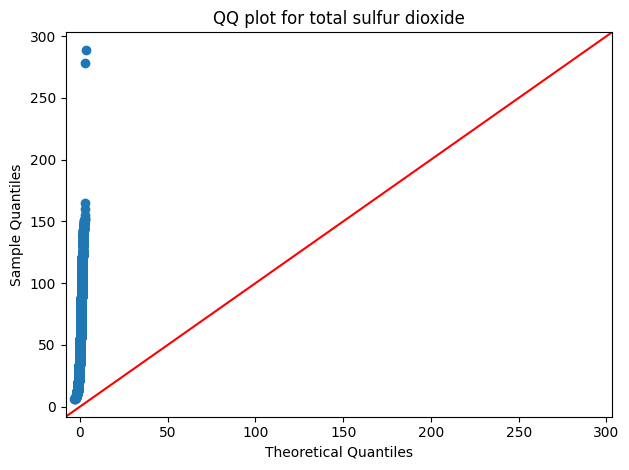

<Figure size 600x400 with 0 Axes>

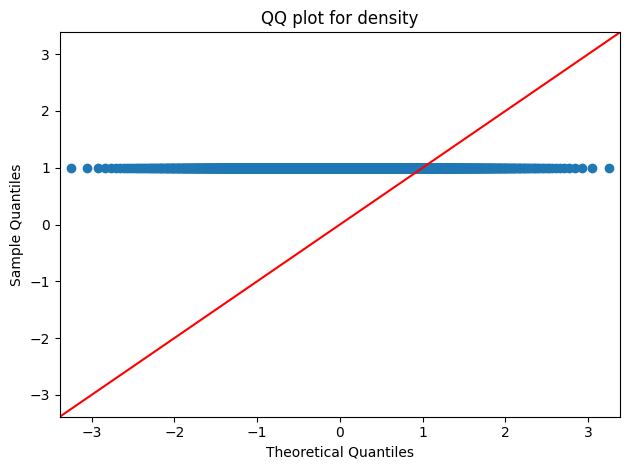

<Figure size 600x400 with 0 Axes>

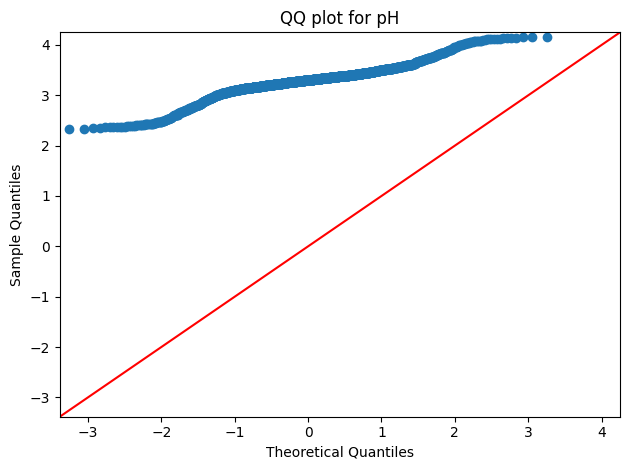

<Figure size 600x400 with 0 Axes>

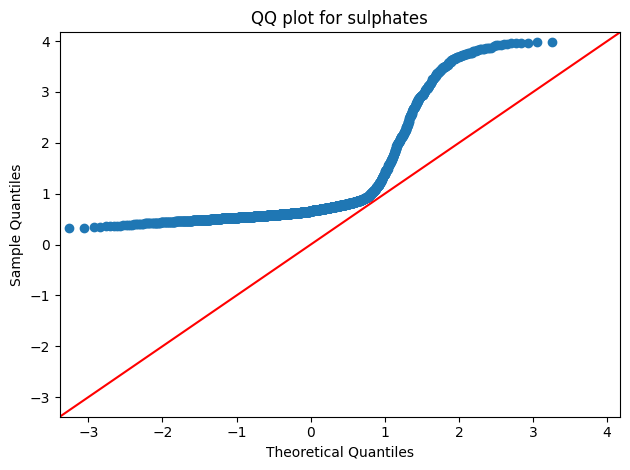

<Figure size 600x400 with 0 Axes>

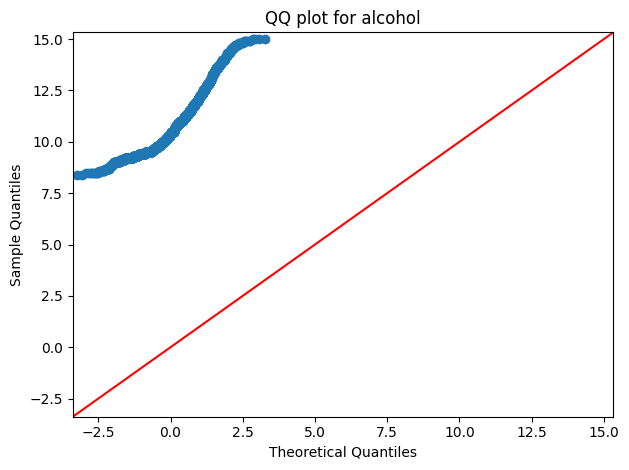

In [11]:
import statsmodels.api as sm
for i in df.columns:
    if i != 'quality':  
        plt.figure(figsize=(6, 4))
        sm.qqplot(df[i], line='45')
        plt.title(f'QQ plot for {i}')
        plt.tight_layout()
        plt.show()

## SKEWNESS AND KURTOSIS

In [12]:
#Calculate skewness and kurtosis
skewness = df.skew()
kurtosis = df.apply(stats.kurtosis)

# Create a new DataFrame to display skewness and kurtosis
skew_kurt_df = pd.DataFrame({
    'skewness': skewness,
    'kurtosis': kurtosis
})

# Print the new table for skewness and kurtosis
print(skew_kurt_df)

                      skewness   kurtosis
fixed acidity         0.959904   0.493913
volatile acidity      0.519885   0.533207
citric acid           0.694806  -0.268677
residual sugar        2.069244   3.307639
chlorides             4.447663  31.789714
free sulfur dioxide   1.308023   1.139733
total sulfur dioxide  1.070325   1.147736
density              -0.198022   0.168882
pH                   -0.445480   2.046222
sulphates             2.260810   4.054686
alcohol               0.935939   0.274805
quality              -0.015667   1.162288


# BIVARIATE ANALYSIS - QUALITY VS EXPLANATORY VARIABLES

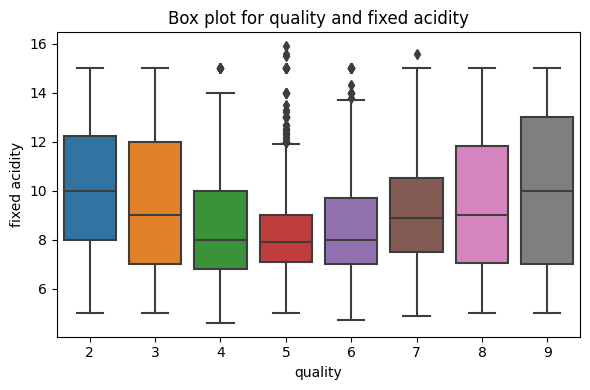

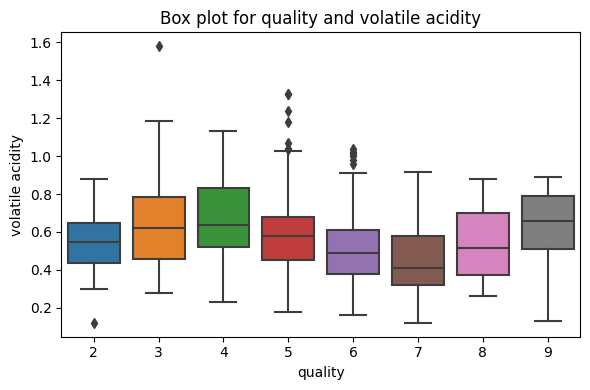

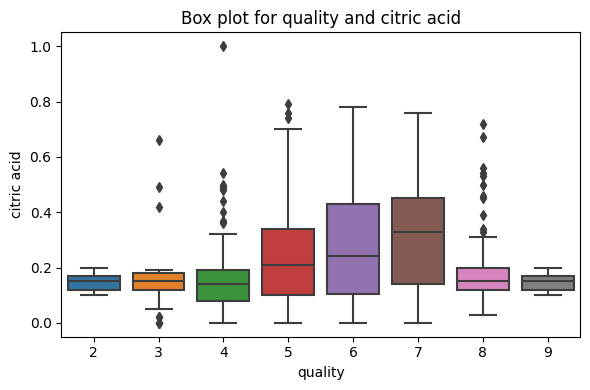

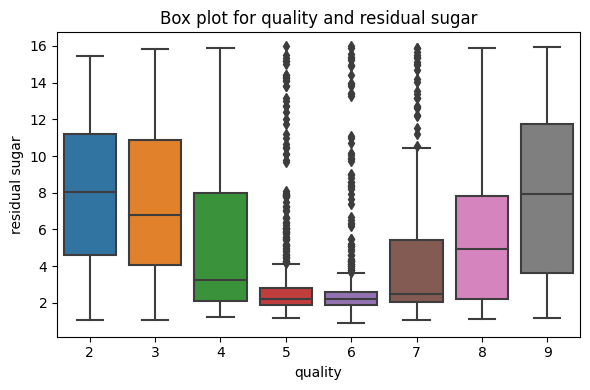

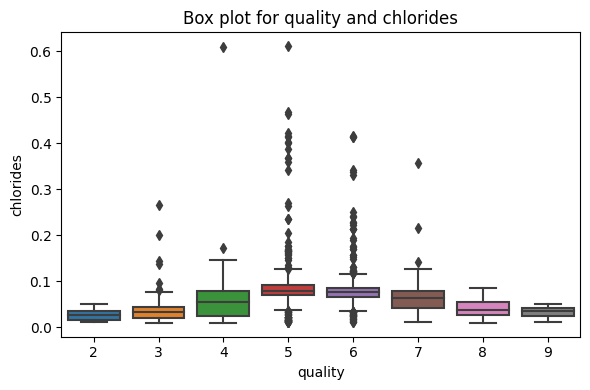

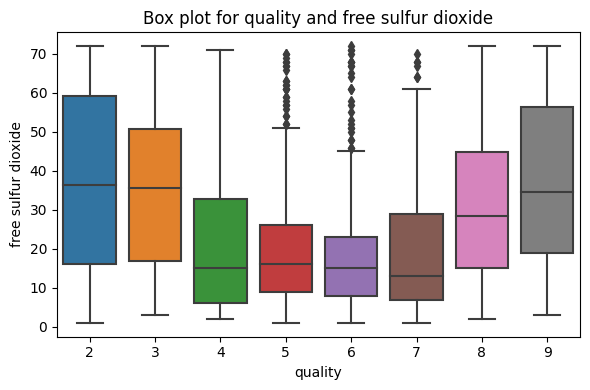

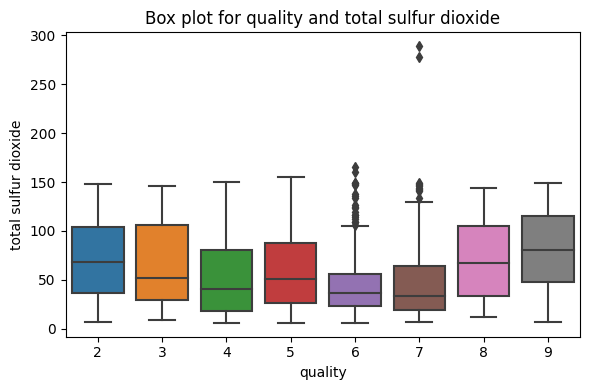

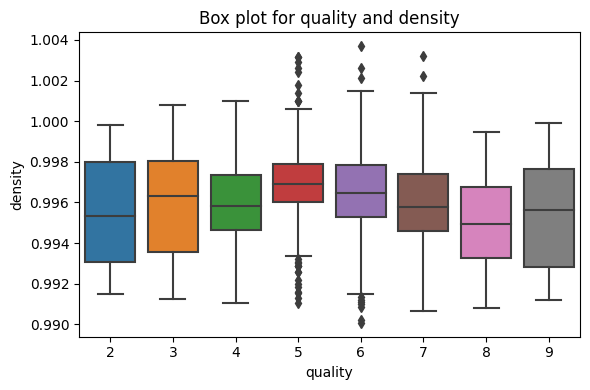

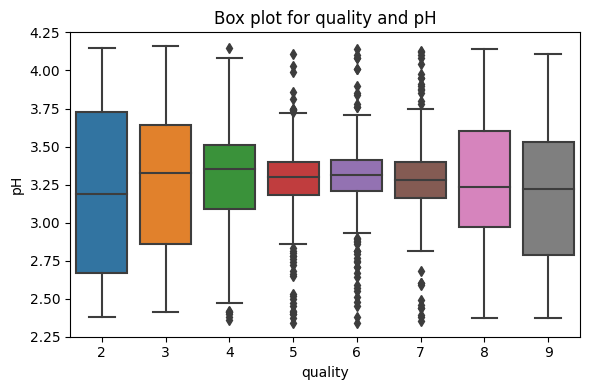

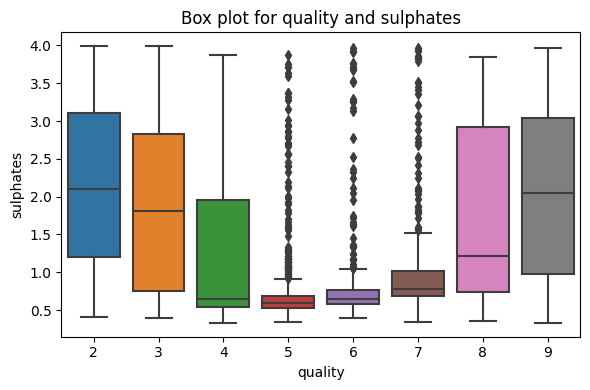

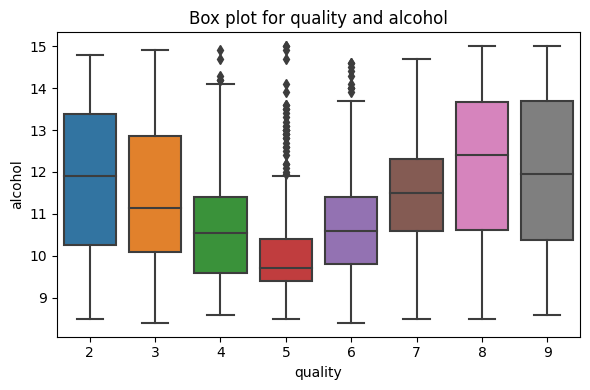

In [13]:
for i in df.columns:
    if i != 'quality':
        plt.figure(figsize=(6, 4))  # Set figure size for each plot
        sns.boxplot(data=df, x='quality', y= i)
        plt.title(f'Box plot for quality and {i}')
        plt.tight_layout()
        plt.show()

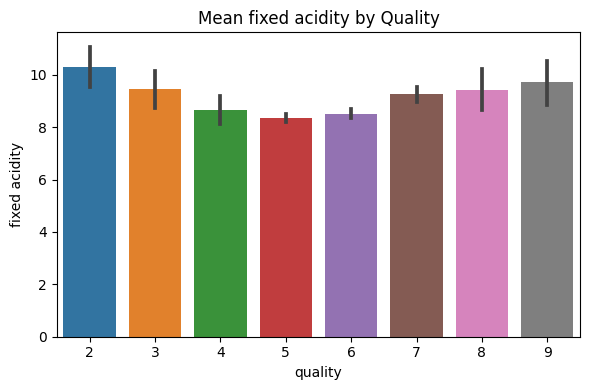

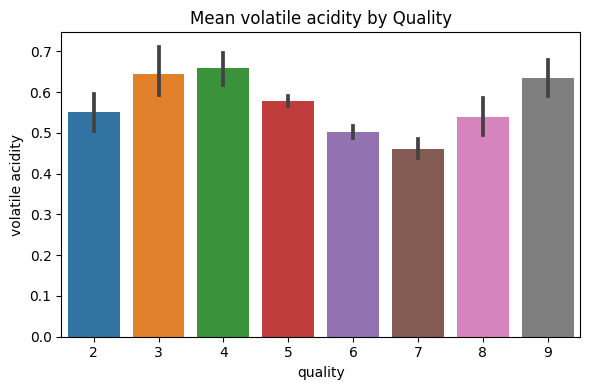

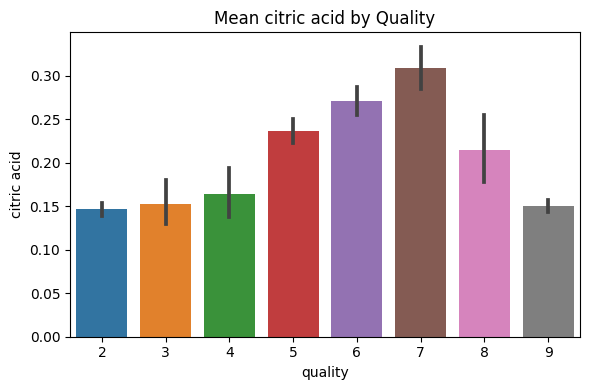

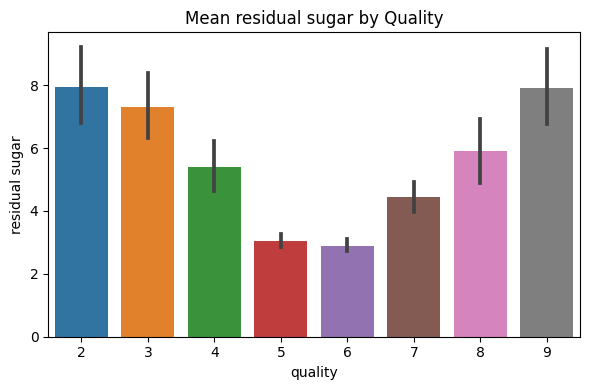

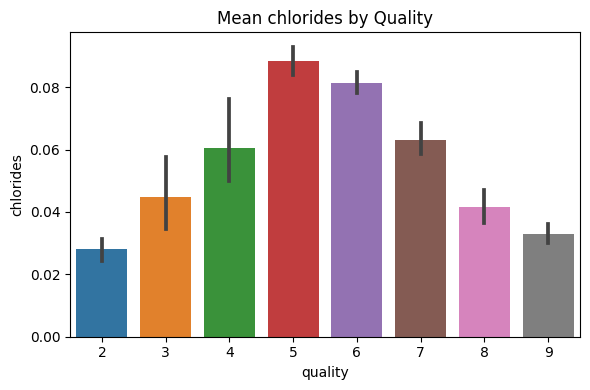

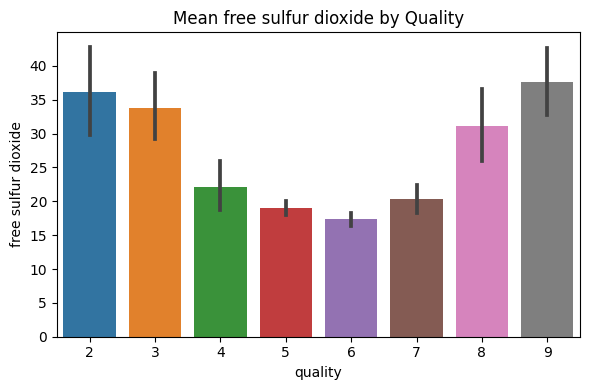

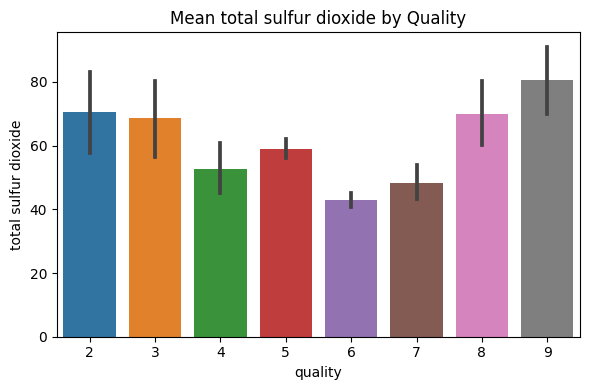

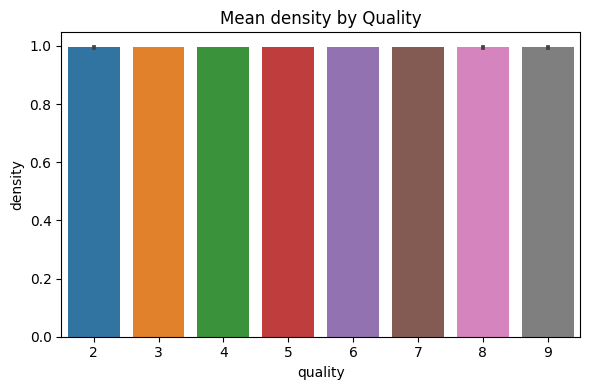

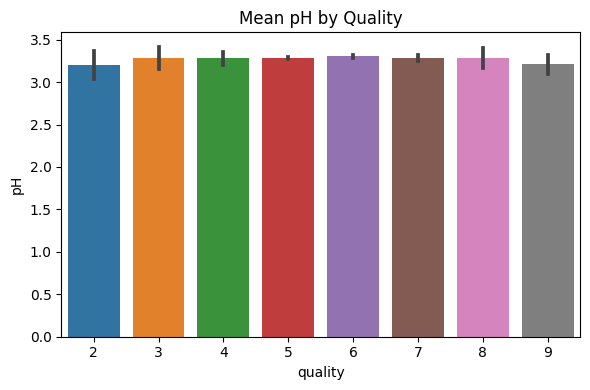

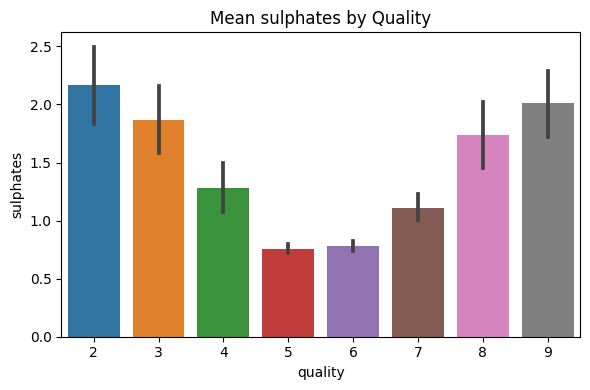

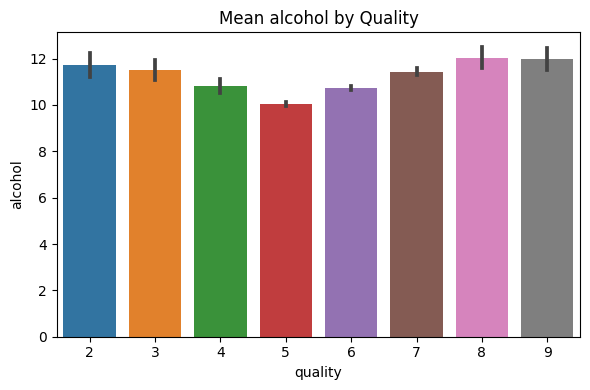

In [14]:
for i in df.columns:
    if i != 'quality':
        plt.figure(figsize=(6, 4))
        sns.barplot(data=df, x='quality', y=i, estimator='mean')  # Default is mean
        plt.title(f'Mean {i} by Quality')
        plt.tight_layout()
        plt.show()

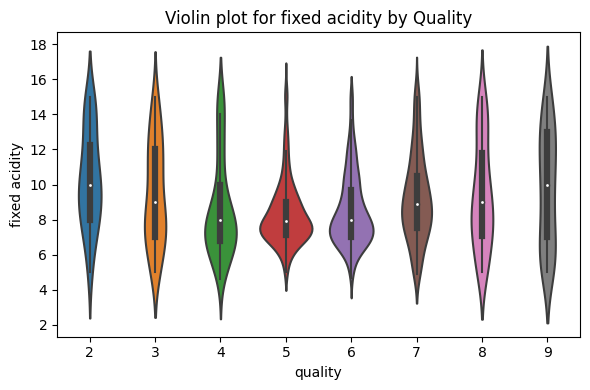

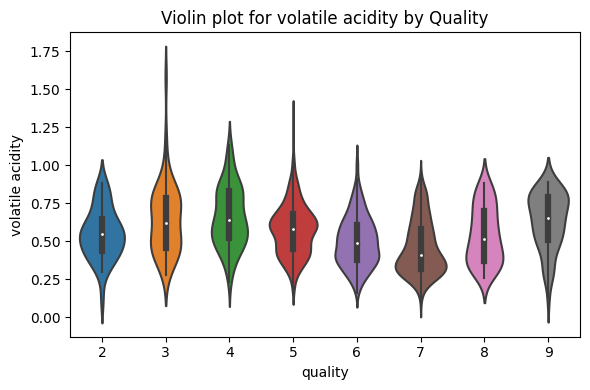

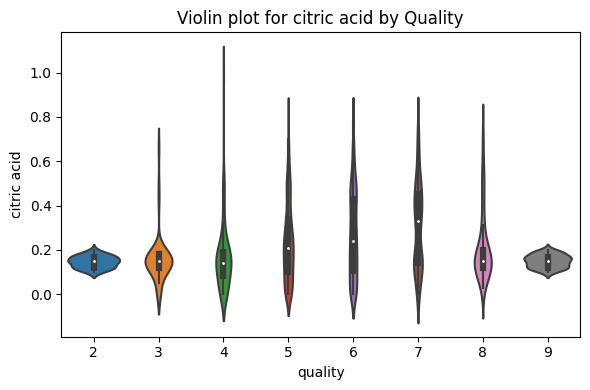

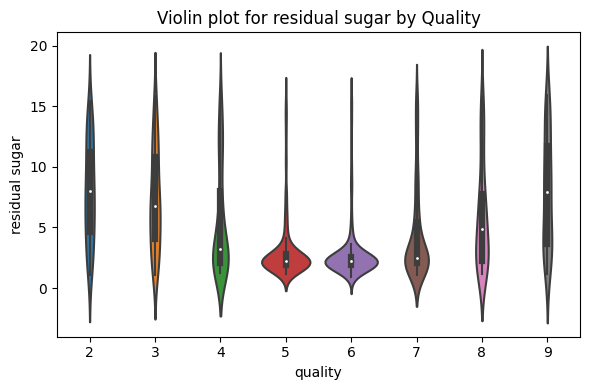

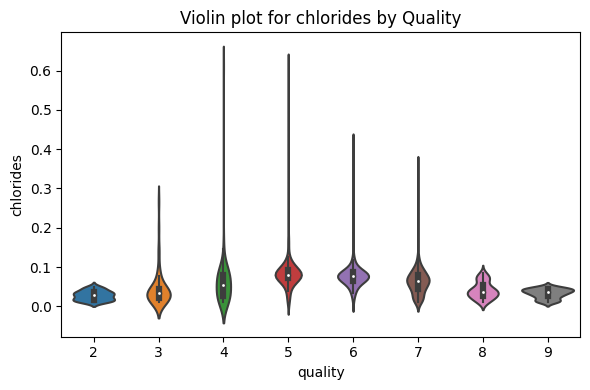

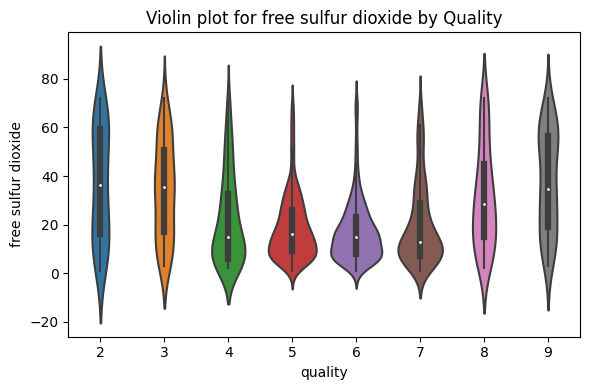

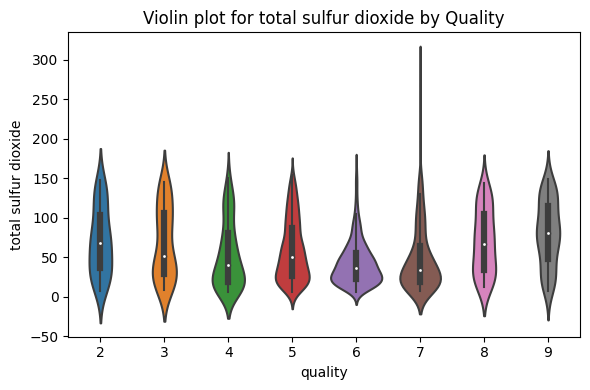

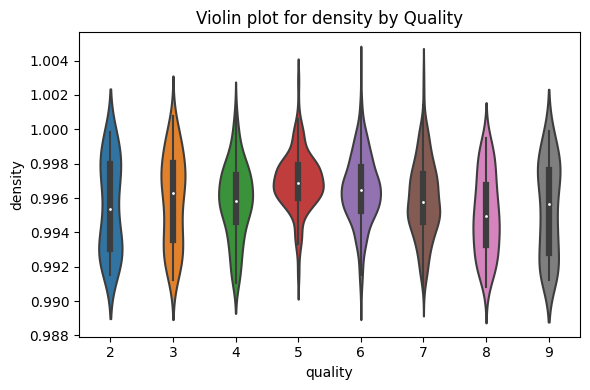

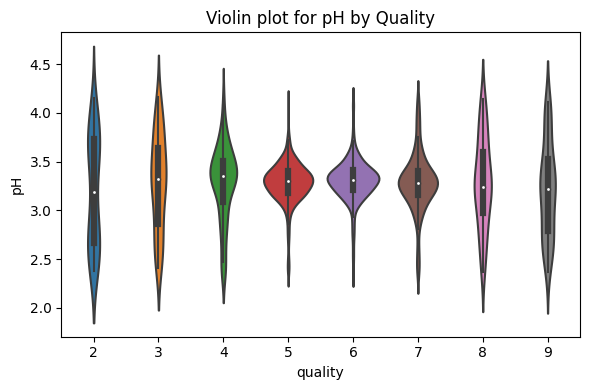

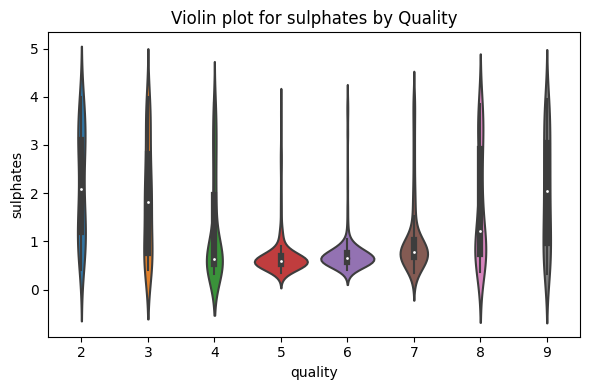

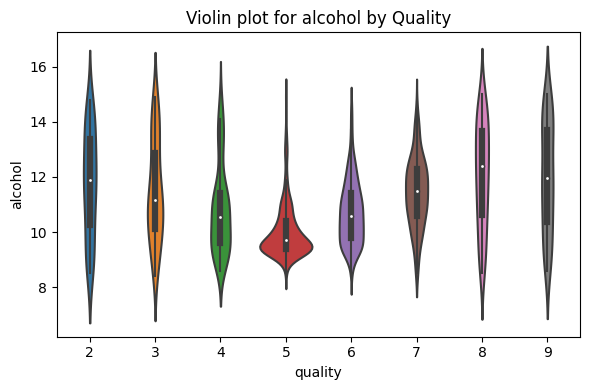

In [15]:
for i in df.columns:
    if i != 'quality':
        plt.figure(figsize=(6, 4))
        sns.violinplot(data=df, x='quality', y=i)
        plt.title(f'Violin plot for {i} by Quality')
        plt.tight_layout()
        plt.show()

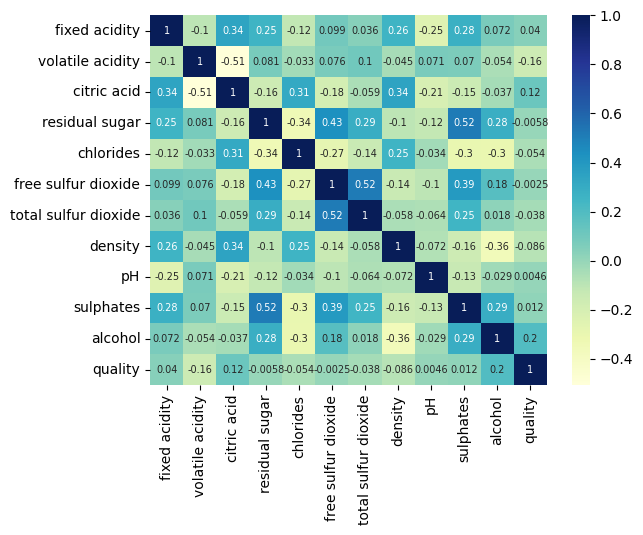

In [16]:
# Plotting the correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, annot_kws={"size": 7})

# Displaying heatmap
plt.show()